# FFT:  aliasing and signal duration 

In this notebook (which follows the one on generalities about Fast Fourier Transform), we will focus on details you must take into account if you want to perform spectral analysis.

## Get the tools ready

First, we call the tools we developed during the previous notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_sine(time_vector : tuple, mean_value : float, amplitude : float, main_frequency : float) :
    
    """This function creates a sine signal using the time vector provided and with 
    the mean_value, amplitude and main_frequency parameters provided. """
    
    # Define the signal vector
    signal_vector = mean_value + amplitude * np.sin(time_vector * main_frequency * 2 * np.pi)
    return signal_vector

def get_noise(time_vector : tuple, noise_amp : float) :
    
    """This function creates a vector of the same length of the vector you give and which values are random floats"""
    
    # Create a vector of the length of the time vector which values are random numbers between -1 and 1
    noise_vector = np.random.random(len(time_vector)) * 2 - 1 
    
    # Multiply the vector you have just created by the amplitude parameter
    noise_vector *= noise_amp
    return noise_vector

def fourier_transform(time_vect : tuple, signal_vect : tuple) :
    """This function automates the computation of the Fourier Transform of a signal."""
    total_time = time_vect[-1] - time_vect[0]
    dt = time_vect[1] - time_vect[0]

    freq_resolution = 1. / total_time
    freq_nyquist = 1. / dt

    all_freq = np.arange(0, freq_nyquist, freq_resolution ,dtype=np.float)
    N = len(time_vect)
    freq = all_freq[0:int(N/2) - 1]

    raw_fft = np.fft.fft(signal_vect)
    amplitude_spectrum = np.absolute(raw_fft)[0:int(N/2) - 1]
    amplitude_spectrum /= N
    amplitude_spectrum[1:] *= 2
    return freq, amplitude_spectrum

def PSD(time_vect:tuple, signal_vect:tuple):
    """This function automates the computation of the Power Spectral Density of a signal."""
    total_time = time_vect[-1] - time_vect[0]
    dt = time_vect[1] - time_vect[0]

    freq_resolution = 1. / total_time
    freq_nyquist = 1. / dt

    frequency = np.arange(0, freq_nyquist, freq_resolution ,dtype=np.float)
    N = len(time_vect)
    frequency = frequency[:int(N/2)-1]
    
    raw_fft = np.fft.fft(signal_vect)
    power_spectral_density = np.square(np.absolute(raw_fft)[:int(N/2)-1]/ np.sqrt(N))
    power_spectral_density[1:] *= 2
    return frequency, power_spectral_density

### 1) Fast Fourier Transform well-known pitfalls

When performing the FFT of a signal there are several points you should care about.
First of them is aliasing.

#### 1.1) Aliasing
Aliasing is the name of the consequence of a poorly refined sampling.

To illustrate this,  create two 8 Hz sine signals on a 1,5 seconds time duration, the first one will be sampled with 128 timesteps and the second one with only 6 timesteps. Then we will plot each signal and its Fourier Transform.

You have to edit the `___`.

/var/folders/1y/mx3dx_f11f1cmf6mc0l79mdh000362/T/ipykernel_2289/1696172072.py:32: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_freq = np.arange(0, freq_nyquist, freq_resolution ,dtype=np.float)


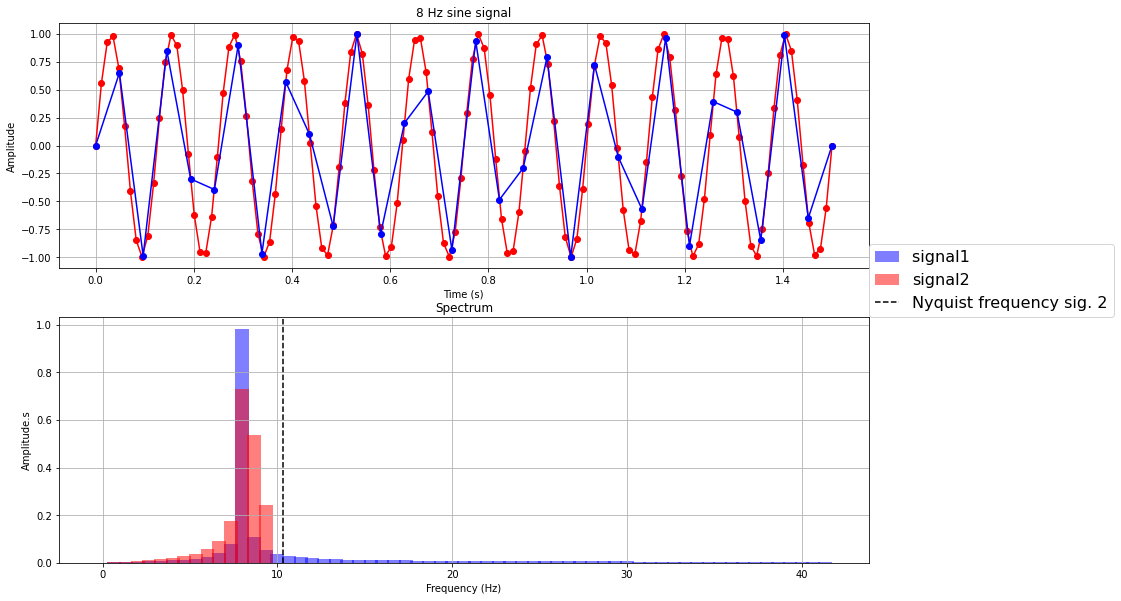

In [2]:


time1 = np.linspace(___)
sine1 = get_sine(___)
freq1, amp1 = fourier_transform(time1, sine1)

time2 = np.linspace(___)
sine2 = get_sine(___)
freq2, amp2 = fourier_transform(time2, sine2)

dt = ___
freq_nyquist2 = 1. / (2 * dt)

fig=plt.figure()
ax=fig.add_subplot(211)
ax.plot(time1, sine1, 'o-r', time2, sine2, 'o-b')

plt.title('8 Hz sine signal')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.grid(True)

ax1 = fig.add_subplot(212)
line1 = ax1.bar(freq1, amp1, color = 'blue', alpha = 0.5)
line2 =ax1.bar(freq2, amp2, color = 'red', alpha = 0.5)
line3 = plt.axvline(freq_nyquist2, color='k', linestyle='--')

plt.title('Spectrum')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Amplitude.s')
ax.legend(
    (line1,line2,line3),
    ( 'signal1 ', 'signal2', 'Nyquist frequency sig. 2'),
    loc=(1, -0.2), handlelength=1.5, fontsize=16)
ax1.grid(True)
plt.subplots_adjust(top = 2, right = 2, wspace = 0.5)
plt.show()


We see that the poorly refined signal looks like a 1 Hz sine signal and the spectrum shows a peak at 1 Hz.

You can now change the value of the number of time samples of the poorly refined signal from 8 to 16 timesteps to see how the peak moves. You should get a peak moving to the right until you reach a 8 Hz value for the peak.

### 5.2) Extending the duration of a signal

What is the effect of increasing or decreasing the signal duration on the amplitude spectrum?  Here we will create a signal and compare its amplitude spectrum with the spectroum done on a fraction of the signal.


/var/folders/1y/mx3dx_f11f1cmf6mc0l79mdh000362/T/ipykernel_2289/1696172072.py:32: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_freq = np.arange(0, freq_nyquist, freq_resolution ,dtype=np.float)


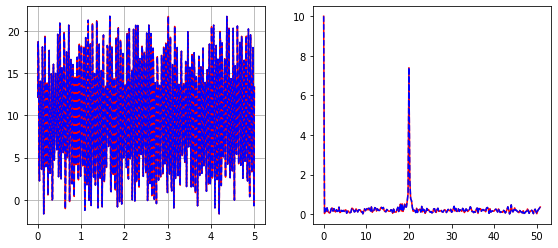

In [3]:
time3 = np.linspace(0., 5, 512)
signal3 = get_sine(time3, 10, 8, 20)
signal3 += get_noise(signal3, 4)
freq3,amp3 = fourier_transform(time3, signal3)


Duration = ___ # Something btw 0 and 1
# The following takes a subset of the signal3.
time4 = time3[:int(len(time3) * Duration)]
signal4 = signal3[:int(len(time3) * Duration)]
freq4,amp4=fourier_transform(time4,signal4)


fig=plt.figure()
ax=fig.add_subplot(131)
plt.plot(time3,signal3,'r',time4,signal4,'--b')
plt.grid()

ax=fig.add_subplot(132)
plt.plot(freq3,amp3,'r',freq4,amp4,'--b')
plt.subplots_adjust(right=2)
